# Control methods

### Importing the packages and the class definition function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

import main_urnings as mu

### Setting up a simulation and the game environment

In [33]:
#game settings
n_player = 1
n_items = 1000
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 1000

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items

player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.8, so_score=10)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = item_true_values[i] * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = [player], items = items, game_type=adaptive_rule)



In [34]:
adaptive_sim.play(n_games=1000)

player.true_value = 0.3

adaptive_sim.play(300)

player.true_value = 0.8

adaptive_sim.play(300)

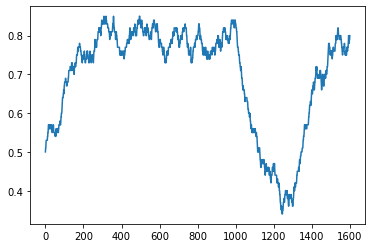

In [4]:
plt.plot(player.container / 100)

In [11]:
diff_vec = []
window = 10

for i in range(len(player.container)):
    if i > window:
        diff_vec.append(player.container[i] - player.container[i - 10])

diff_vec = np.array(diff_vec)

In [31]:

signal = []
confidence = 98

for i in range(1,len(diff_vec) - 1):
    dv_window = diff_vec[:i]
    dv_conf = np.percentile(dv_window,[100 - confidence,confidence])

    if diff_vec[i+1] > dv_conf[1] or diff_vec[i+1] < dv_conf[0]:
        signal.append(1)
    else:
        signal.append(0)


    


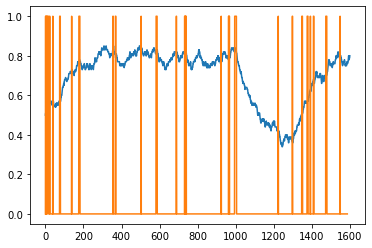

In [32]:
plt.plot(player.container/ 100) 
plt.plot(signal)


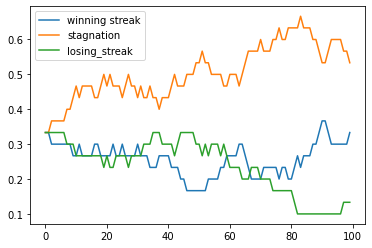

In [14]:
so_results = np.reshape(player.so_container, (int(len(player.so_container)/3), 3)) / player.so_urn_size

plt.plot(so_results[:100,0], label = "winning streak")
plt.plot(so_results[:100,1], label = "stagnation")
plt.plot(so_results[:100,2], label = "losing_streak")
plt.legend()


In [15]:
prec = 3
signal2 = []
for i in range(len(so_results[:,0])):
    a = np.random.multinomial(prec, so_results[i,:])
    
    if a[0] == prec:
        signal2.append(1)
    elif a[1] == prec:
        signal2.append(0)
    elif a[2] == prec:
        signal2.append(0.5)
    else:
        signal2.append(0)

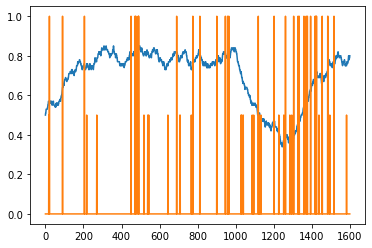

In [16]:
plt.plot(player.container/ 100)
#plt.plot(signal)
plt.plot(signal2)

# Moving window with frequentist and bayesian approach

In [61]:
signal3 = []
window = 10
prec = 4

for i in range(len(player.differential_container)):

    if i >= window:
        a = player.differential_container[(i-10):i]
        unique, freq = np.unique(a, return_counts=True)
        prob = freq / window

        #drawing a probabilty vector
        obs = np.random.multinomial(prec, prob)

        if prec in obs:

            signal3.append(int(unique[np.where(obs == prec,)]))
        else:
            signal3.append(0)



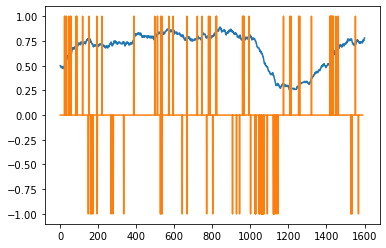

In [57]:
plt.plot(player.container / player.urn_size)
plt.plot(signal3)

In [27]:
slope = []
window = 40
for i in range(len(player.container)):
     if i >= window:
        y = player.container[(i-window):i]
        x = np.linspace(1, len(y), len(y))

        m, b = np.polyfit(x,y,1)
        slope.append(m)
        

signal4 = []
confidence = 99

for i in range(1,len(slope) - 1):
    dv_window = diff_vec[:i]
    dv_conf = np.percentile(dv_window,[100 - confidence,confidence])

    if diff_vec[i+1] > dv_conf[1] or diff_vec[i+1] < dv_conf[0]:
        signal4.append(1)
    else:
        signal4.append(0)


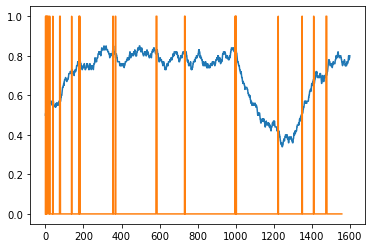

In [28]:
plt.plot(player.container / player.urn_size)
plt.plot(signal4)